In [ ]:
import numpy as np
import scipy as sp
from scipy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy.random import uniform as uni

def tau(Ny1,alpha_1):
  return -np.identity(Ny1)*alpha_1

def Hx(Ny2,alpha2,kx2,dx2):
  out2 = np.zeros((Ny2,Ny2))
  tmp2 = 4*alpha2 -alpha2*(np.exp((0+1j)*kx2*dx2)+np.exp((0-1j)*kx2*dx2))
  for i2 in range(Ny2):
    out2[i2,i2]= tmp2
    if i2>0:
      out2[i2-1,i2] = -alpha2
      out2[i2,i2-1] = -alpha2
  return out2

def H2(Ny2,alpha2):
  out2 = np.zeros((Ny2,Ny2))
  tmp2 = 4*alpha2
  for i2 in range(Ny2):
    out2[i2,i2]= tmp2
    if i2>0:
      out2[i2-1,i2] = -alpha2
      out2[i2,i2-1] = -alpha2
  return out2


def eigen(H3,N3):
  vals3,vecs3 = eigh(H3,subset_by_index= [0,N3-1])
  return vals3,vecs3

def eigen2(H3,B3):
  vals3,vecs3 = eig(H3,b=B3)
  return vals3,vecs3

def v(dx4,lm4,vecs4,tau4,n4):
  temp_v = vecs4.T
  temp_t = np.matrix(tau4).H
  u4 = temp_v[n4,0:21]
  if n4>20:
    u4=temp_v[41-n4,0:21]
  return -2*dx4*np.imag(lm4[n4]*np.matrix(u4).H.T @ temp_t @ u4.T)

def kx(lm5,n5):
  return np.imag(np.log(lm5[n5]))


<ipython-input-41-c9af80eae8c5>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  out2[i2,i2]= tmp2


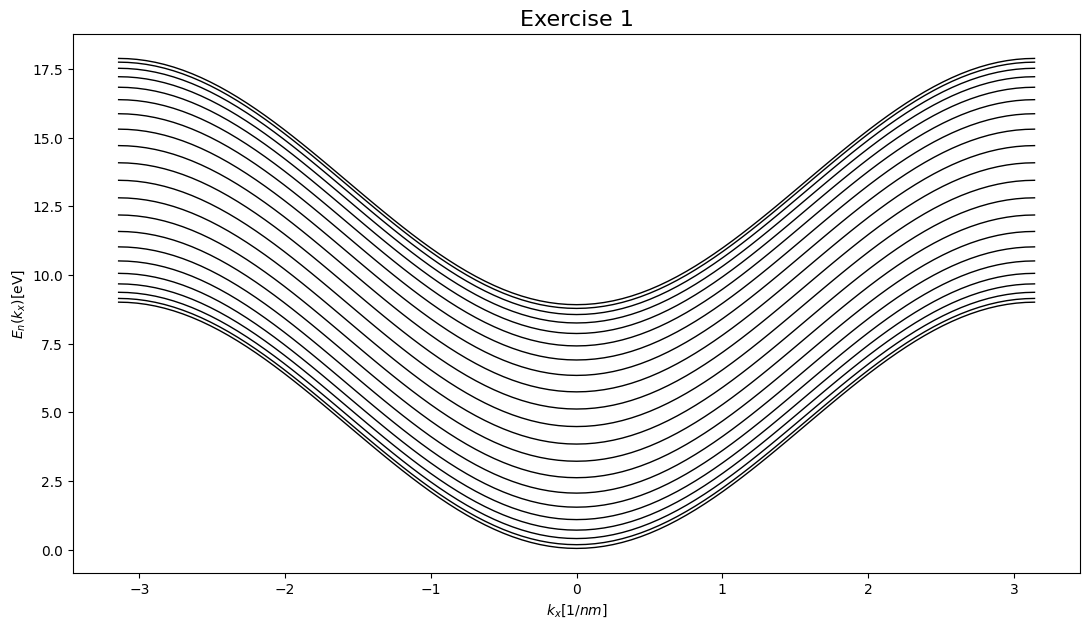

In [ ]:
ny = 21
Ys=np.linspace(-10/0.052918,10/0.052918,ny)
dx = Ys[1]-Ys[0]
nk = 101
kxs = np.linspace(-np.pi/dx,np.pi/dx,nk)
nstates = 21
m = 0.017
alpha = 1/(2*m*dx**2)
Eh=27.211

out_1 = np.zeros((nstates,nk))
for i in range(nk):
  out_1[:,i],vecs=eigen(Hx(ny,alpha,kxs[i],dx),nstates)





fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel(r'$E_n(k_x)$[eV]')
ax.set_xlabel(r'$k_x[1/nm]$')
ax.set_title(r'Exercise 1', fontsize = 16)
for i in range(nstates):
    plt.plot(kxs/0.052918,out_1[i,:]*Eh,label = f'n= {i+1}',c='k',linewidth = 1)


plt.show()

In [ ]:
E1 = 0.2/Eh
E2 = 0.4/Eh

tau1 = tau(ny,alpha)
ident = np.identity(ny)
zs = np.zeros((ny,ny))
Ham = H2(ny,alpha)

H_1 = np.concatenate((np.concatenate((zs,ident),axis = 1),np.concatenate((-tau1,ident*E1-Ham),axis = 1)),axis = 0)
H_2 = np.concatenate((np.concatenate((zs,ident),axis = 1),np.concatenate((-tau1,ident*E2-Ham),axis = 1)),axis = 0)

B= np.concatenate((np.concatenate((ident,zs),axis = 1),np.concatenate((zs,tau1),axis = 1)),axis = 0)

vals1,vecs1 = eigen2(H_1,B)
vals2,vecs2 = eigen2(H_2,B)
print(vals2)

[5.62333323+0.j         5.5606724 +0.j         5.45755249+0.j
 5.31591346+0.j         5.13840713+0.j         4.92833396+0.j
 4.68956297+0.j         4.42643543+0.j         4.14365298+0.j
 3.84615025+0.j         3.53895123+0.j         3.22700642+0.j
 2.91500287+0.j         2.60712679+0.j         2.30672394+0.j
 2.01569175+0.j         1.73298145+0.j         1.44877586+0.j
 0.92093897+0.38970683j 0.92093897-0.38970683j 0.95126744+0.30836709j
 0.95126744-0.30836709j 1.04864791+0.j         0.95360892+0.j
 0.6902379 +0.j         0.57704022+0.j         0.4961076 +0.j
 0.43351525+0.j         0.38356401+0.j         0.34305284+0.j
 0.30988473+0.j         0.28256959+0.j         0.26000024+0.j
 0.24133295+0.j         0.22591542+0.j         0.21323949+0.j
 0.20290833+0.j         0.19461284+0.j         0.18811442+0.j
 0.18323232+0.j         0.17783047+0.j         0.17983437+0.j        ]


In [ ]:
lambdas1 = np.where(abs(np.abs(vals1)-1)<1e-10)[0]
lambdas2 = np.where(abs(np.abs(vals2)-1)<1e-10)[0]

print('indeksy propagujących się modów dla E=0.2eV:\n'+str(lambdas1)+'\n' )
print('indeksy propagujących się modów dla E=0.4eV:\n'+str(lambdas2)+'\n' )

indeksy propagujących się modów dla E=0.2eV:
[19 20 21 22]

indeksy propagujących się modów dla E=0.4eV:
[18 19 20 21]



In [ ]:
vs1 = np.zeros(len(lambdas1))
vs2 = np.zeros(len(lambdas2))
for it in range(len(lambdas1)):
  vs1[it] = v(dx,vals1,vecs1,tau1,lambdas1[it])
  vs2[it] = v(dx,vals2,vecs2,tau1,lambdas2[it])

print('prędkości dla E=0.2eV:\n'+str(vs1)+'\n' )
print('prędkości dla E=0.4eV:\n'+str(vs2)+'\n' )

prędkości dla E=0.2eV:
[ 0.40495512 -0.40495512  0.14101316 -0.14101316]

prędkości dla E=0.4eV:
[ 0.6065443  -0.6065443   0.47994617 -0.47994617]



In [ ]:
ks1 = np.zeros(len(lambdas1))
ks2 = np.zeros(len(lambdas2))
for it in range(len(lambdas1)):
  ks1[it] = kx(vals1,lambdas1[it])
  ks2[it] = kx(vals2,lambdas2[it])

print('wartości k dla E=0.2eV:\n'+str(ks1)+'\n' )
print('wartości k dla E=0.4eV:\n'+str(ks2)+'\n' )

wartości k dla E=0.2eV:
[ 0.26321388 -0.26321388  0.09072586 -0.09072586]

wartości k dla E=0.4eV:
[ 0.40031324 -0.40031324  0.313476   -0.313476  ]



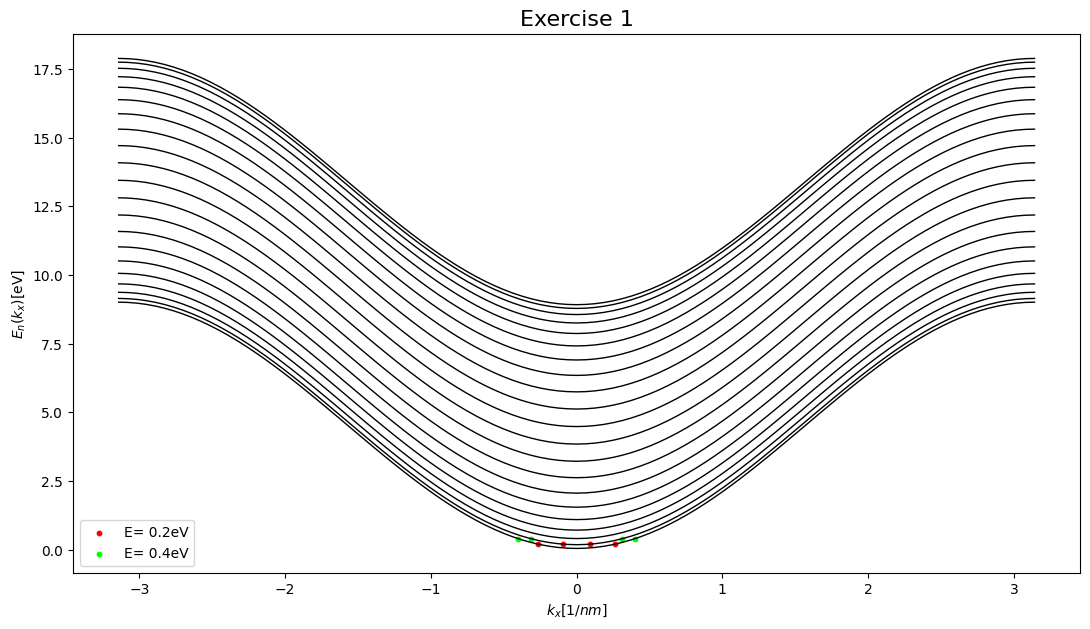

In [ ]:
fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel(r'$E_n(k_x)$[eV]')
ax.set_xlabel(r'$k_x[1/nm]$')
ax.set_title(r'Exercise 1', fontsize = 16)
for i in range(nstates):
    plt.plot(kxs/0.052918,out_1[i,:]*Eh,linewidth = 1,c='k')


plt.scatter(ks1,np.ones(4)*E1*Eh,label = f'E= 0.2eV',c='red',s=10)
plt.scatter(ks2,np.ones(4)*E2*Eh,label = f'E= 0.4eV',c='lime',s=10)
plt.legend()
plt.show()

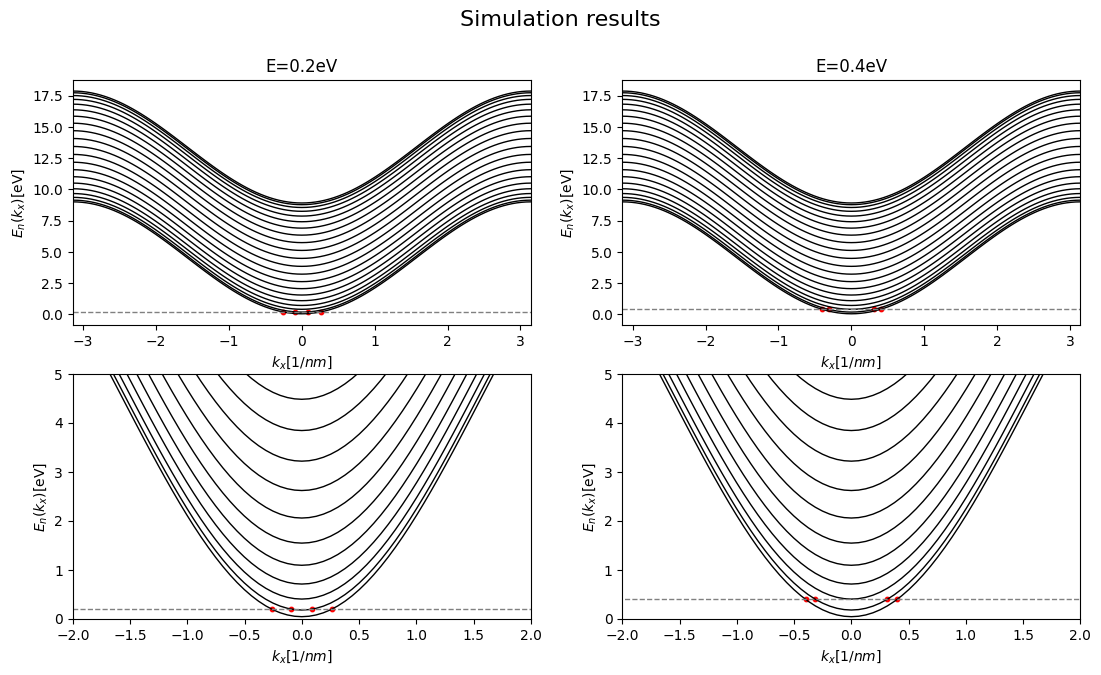

In [ ]:

fig, axs = plt.subplots(2,2,figsize=(13,7))
fig.suptitle('Simulation results',fontsize = 16)

plt.sca(axs[0,0])
plt.title('E=0.2eV')
plt.ylabel(r'$E_n(k_x)$[eV]')
plt.xlabel(r'$k_x[1/nm]$')
plt.xlim(-np.pi,np.pi)
for i in range(nstates):
    plt.plot(kxs/0.052918,out_1[i,:]*Eh,linewidth = 1,c='k')

plt.scatter(ks1,np.ones(4)*E1*Eh,label = f'E= 0.2eV',c='red',s=10)
plt.plot([-np.pi,np.pi],[E1*Eh,E1*Eh],linestyle ='--',c = 'grey',linewidth = 1)


plt.sca(axs[0,1])

plt.title('E=0.4eV')
plt.ylabel(r'$E_n(k_x)$[eV]')
plt.xlabel(r'$k_x[1/nm]$')
plt.xlim(-np.pi,np.pi)
for i in range(nstates):
    plt.plot(kxs/0.052918,out_1[i,:]*Eh,linewidth = 1,c='k')

plt.scatter(ks2,np.ones(4)*E2*Eh,label = f'E= 0.4eV',c='red',s=10)
plt.plot([-np.pi,np.pi],[E2*Eh,E2*Eh],linestyle ='--',c = 'grey',linewidth = 1)

plt.sca(axs[1,0])

plt.ylabel(r'$E_n(k_x)$[eV]')
plt.xlabel(r'$k_x[1/nm]$')
plt.xlim(-2,2)
plt.ylim(0,5)
for i in range(nstates):
    plt.plot(kxs/0.052918,out_1[i,:]*Eh,linewidth = 1,c='k')

plt.scatter(ks1,np.ones(4)*E1*Eh,label = f'E= 0.2eV',c='red',s=10)
plt.plot([-np.pi,np.pi],[E1*Eh,E1*Eh],linestyle ='--',c = 'grey',linewidth = 1)


plt.sca(axs[1,1])


plt.ylabel(r'$E_n(k_x)$[eV]')
plt.xlabel(r'$k_x[1/nm]$')
plt.xlim(-2,2)
plt.ylim(0,5)
for i in range(nstates):
    plt.plot(kxs/0.052918,out_1[i,:]*Eh,linewidth = 1,c='k')

plt.scatter(ks2,np.ones(4)*E2*Eh,label = f'E= 0.4eV',c='red',s=10)
plt.plot([-np.pi,np.pi],[E2*Eh,E2*Eh],linestyle ='--',c = 'grey',linewidth = 1)


plt.show()